# Implementation of Unsupervised Learning (Kmeans and Hierarchial Clustering) in Iris Dataset

### Objective :

The objective of this assessment is to apply and evaluate clustering techniques using the Iris dataset, a well-known dataset in machine learning and statistics. The assessment involves loading and preprocessing the data, implementing KMeans and Hierarchical clustering algorithms, and visualizing the resulting clusters.

## Loading and Preprocessing
 
### Dataset Overview: 

The Iris dataset is a well-known dataset that contains measurements of four features from three different species of Iris flowers.
The features are:
Sepal length
Sepal width
Petal length
Petal width
The dataset contains 150 samples with each sample belonging to one of three species: Iris setosa, Iris versicolor, and Iris virginica. For clustering purposes, the species column will be dropped to focus solely on the feature data.

### Preprocessing Steps:

Load the Dataset: Use load_iris() from the sklearn.datasets module.
Drop the Species Column: Since the species label is not used in clustering, it will be excluded from the feature set.
Standardize the Data (Optional but Recommended): Although not specified, it is often beneficial to scale the data to ensure that all features contribute equally to the clustering process.

### Importing libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris

### Loading Iris Dataset 

In [60]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Data Preprocessing

In [61]:
# Renaming the columns for easy use
df = df.rename(
    columns={'sepal length (cm)': 'sepal_length',
             'sepal width (cm)' : 'sepal_width',
             'petal length (cm)' : 'petal_length',
             'petal width (cm)' : 'petal_width'})
df.head()    # displays first 5 rows

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
df.tail()   # displays last 5 rows

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [63]:
df.info()    # shows the basic information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### As all the columns contains 'float' as datatype , No need for Encoding.

In [64]:
df.columns   # shows all the column names in the dataset

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [65]:
df.shape     # shows the shape of dataset (rows, columns)

(150, 4)

In [66]:
df.size      # shows the size of dataset (rows * columns)

600

In [67]:
df.describe()    # shows statistical analysis of iris dataset

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### No target feature is there in this dataset so nothing to drop

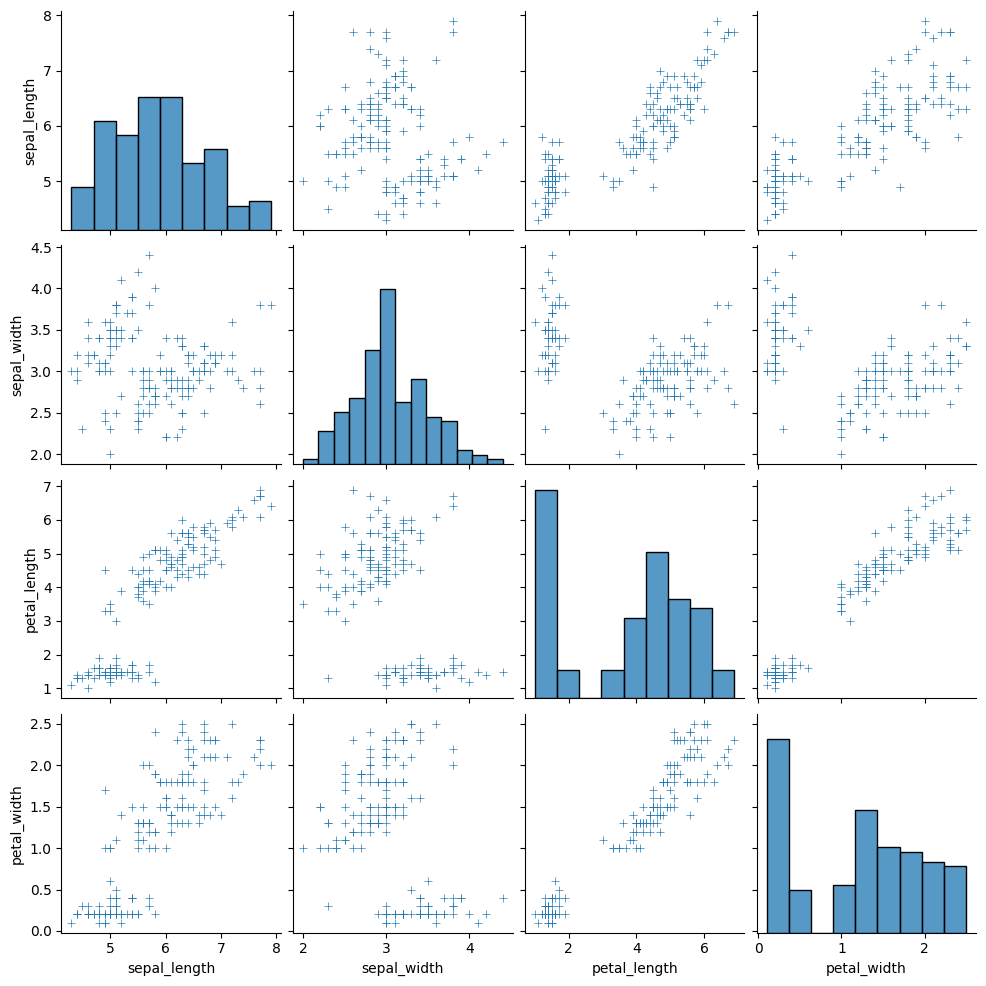

In [68]:
# Shows the relation between each columns

sns.pairplot(df,markers = '+')
plt.show()

By seeing this plot we can say that they are highly correlated and we can make a heatmap showing the correlation

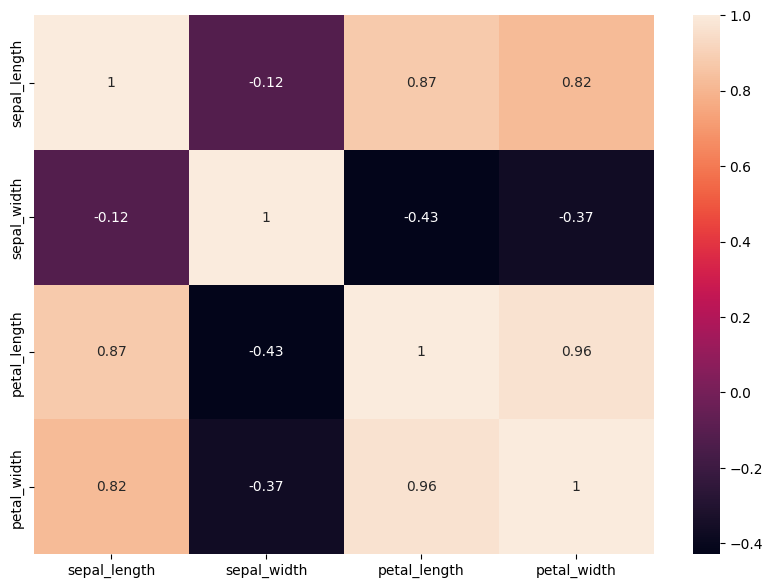

In [69]:
# Show the correlation between each columns

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True) # 'annot' to see the annotation value inside the heatmap
plt.show()

Heatmap showing the correlation affecting positively and negatively 

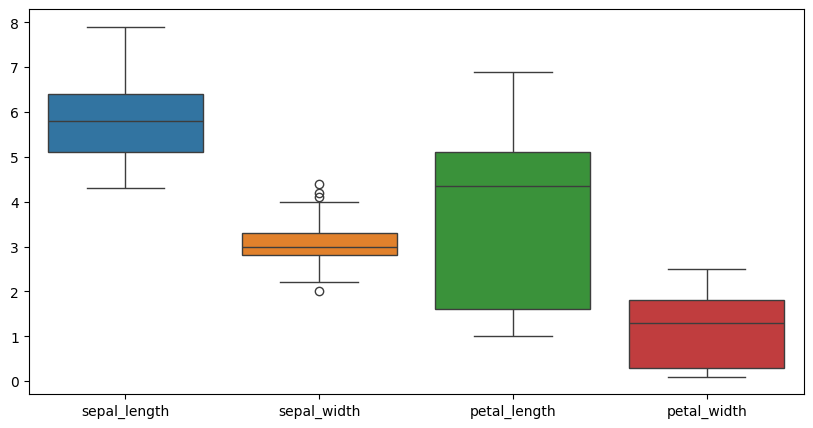

In [70]:
# displaying boxplot for identifying the outliers in each column
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)  # Create a single subplot
sns.boxplot(data=df)
plt.show()

Here we can clearly see that the ouliers are present in column 'sepal_width'

In [71]:
# Found outliers in Sepal Width using boxplot method above and using IQR method removing outliers
sw_Q1 = df['sepal_width'].quantile(0.25)
sw_Q3 = df['sepal_width'].quantile(0.75)
sw_IQR = sw_Q3 - sw_Q1
print(" Sepal Width Q1 :",sw_Q1)
print(" Sepal Width Q3 :",sw_Q3)

# finding the lower whisker and upper whisker
lw = sw_Q1 - 1.5 * sw_IQR
uw = sw_Q3 + 1.5 * sw_IQR
print("Threshold below :",lw)
print("Threshold above :",uw)

# Identifying outliers
Outlier_sw = df[(df['sepal_width'] < lw) | (df['sepal_width'] > uw)]
print("\nOutliers found in Sepal Width are showing below")
Outlier_sw

 Sepal Width Q1 : 2.8
 Sepal Width Q3 : 3.3
Threshold below : 2.05
Threshold above : 4.05

Outliers found in Sepal Width are showing below


,sepal_length,sepal_width,petal_length,petal_width
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


In [72]:
# Cleaned dataset after removing the outliers
df_cleaned = df[(df['sepal_width'] > lw) & (df['sepal_width'] < uw)]
df_cleaned

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


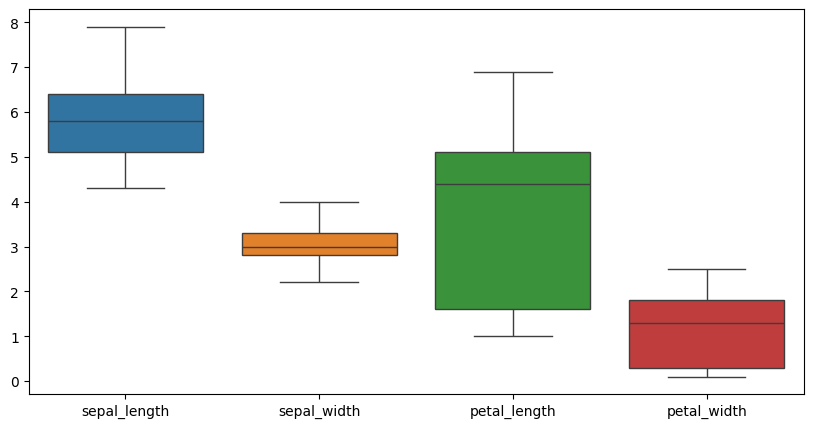

In [73]:
# displaying boxplot after removing the outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)  # Create a single subplot
sns.boxplot(data=df_cleaned)
plt.show()

Here we can see that all outliers are removed from the dataset using IQR method

In [74]:
# checking if any duplicates are present
df_cleaned.duplicated().sum()    

1

In [75]:
df_cleaned = df_cleaned.drop_duplicates()    # to delete the duplicated values
df_cleaned.duplicated().sum()

0

## Implementing KMeans clustering algorithm in the Iris Dataset


KMeans clustering is a partition-based method that aims to divide a dataset into K distinct, non-overlapping subsets (clusters).
It does this by:

Initializing K centroids randomly.

Assigning each data point to the nearest centroid based on Euclidean distance.

Recalculating the centroids as the mean of the assigned data points.

Repeating steps 2 and 3 until the centroids converge (i.e., their positions no longer change significantly).

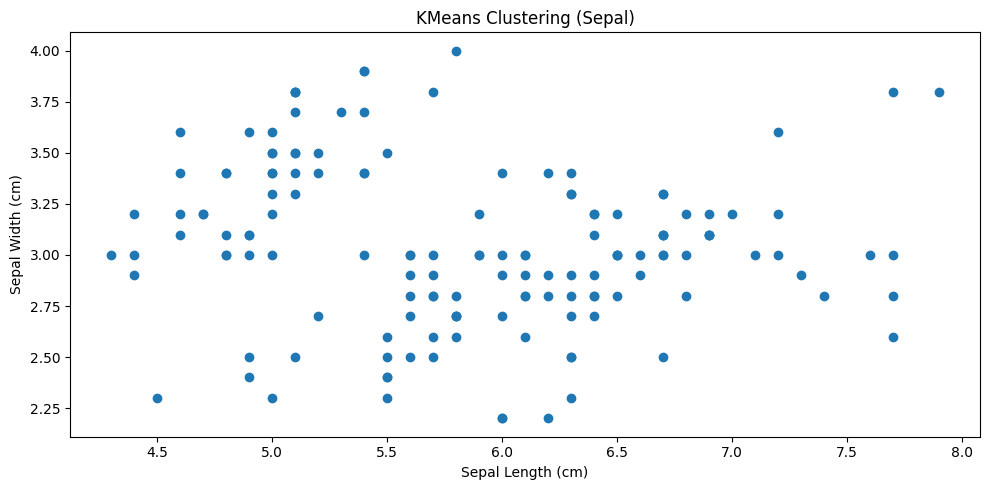

In [90]:
# Import necessary libraries
from sklearn.cluster import KMeans


# Visualize the clusters
plt.figure(figsize=(10, 5))


plt.scatter(df_cleaned['sepal_length'], df_cleaned['sepal_width'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KMeans Clustering (Sepal)')


plt.tight_layout()
plt.show()

Scatterplot btw Sepal Length and Sepal Width to find the number of clusters visually and as it is difficult to find the no. of clusters visually we have to use elbow method and silhoutte score method

[653.3326896551724, 143.53031578947366, 72.81484867818801, 52.87148623613383, 46.992464565527065, 43.55607567663817, 36.35197637292465, 33.22326177472923, 27.344240104122456]


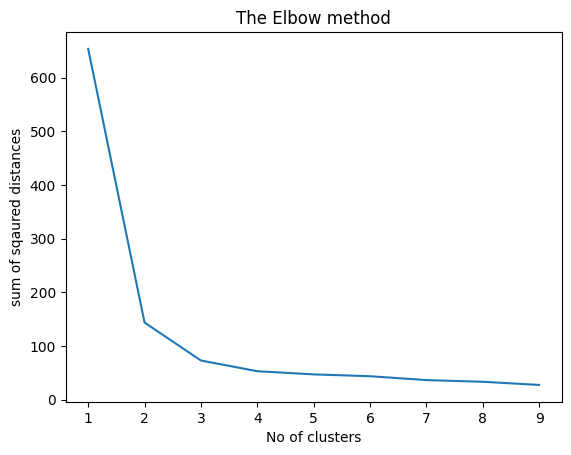

In [91]:
# Visualising the Elbow plot to find the number of clusters 

wcss = []  # within cluster sum of sqaures
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state=42)
    kmeans.fit(df_cleaned)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1,10),wcss)
plt.title('The Elbow method')
plt.xlabel('No of clusters')

plt.ylabel('sum of sqaured distances')
plt.show()

### The optimal number of clusters (k) is typically identified at the "elbow point" in the elbow plot, where the WCSS starts to decrease at a slower rate. From the plot, the elbow point appears to be at \( k = 3 \). This suggests that 3 clusters are the optimal number for the Iris dataset.

In [78]:
# finding the silhouette score method to find the number of clusters (highest silhouette score considers to number of clusters)

from sklearn.metrics import silhouette_score
sil_score = []
k_rng = range(2,11)
for i in k_rng:
    kmeans = KMeans(n_clusters=i)
    km_pred = kmeans.fit_predict(df_cleaned)
    sil_score.append(silhouette_score(df_cleaned, km_pred))
sil_score
    

[0.6862748864185023,
 0.5549469876765111,
 0.4196211275198991,
 0.495902061403267,
 0.334741821075682,
 0.35369593632254753,
 0.34721197159972617,
 0.3060089696743047,
 0.298080894071132]

 The silhouette coefficient measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
   - It ranges from -1 to 1, where a higher value indicates better-defined clusters.
   - For the Iris dataset, a peak in the silhouette coefficient at 2 clusters suggests that, on average, samples are well-matched to their own cluster and poorly matched to neighboring clusters when there are 2 clusters.
 
 As per silhouette score we can see that the no of clusters will be 2. But as per elbow method and domain knowledge we can take 3 as number of clusters

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

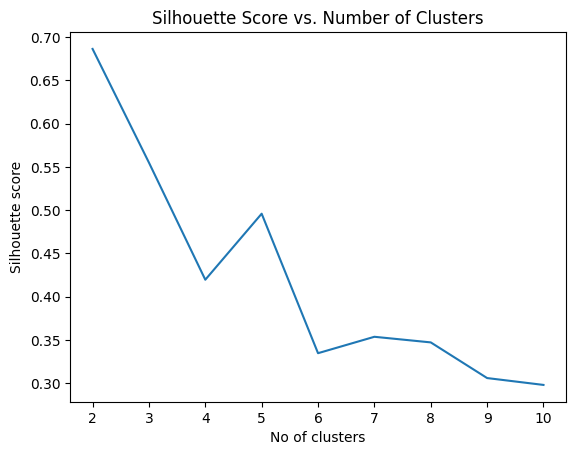

In [79]:
plt.xlabel('No of clusters')
plt.ylabel('Silhouette score')
plt.plot(k_rng,sil_score)
plt.title('Silhouette Score vs. Number of Clusters')

This plot shows the number of clusters taken from silhouette score ( higher silhouette score is optimal )

### Feature Scaling

In [80]:
# Importing Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfc_scaled = scaler.fit_transform(df)


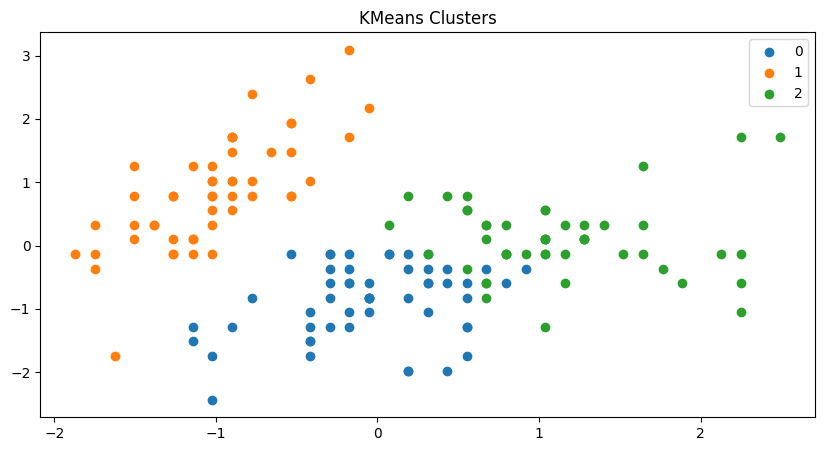

In [81]:
 
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
y = kmeans.fit_predict(dfc_scaled)
unique_labels = np.unique(y)
 
# Visualize the clusters
plt.figure(figsize=(10, 5))
for i in unique_labels:
    plt.scatter(dfc_scaled[y==i,0],dfc_scaled[y==i,1],label=i)
plt.title('KMeans Clusters')
plt.legend()
plt.show()

The different colored points represent different clusters. Each cluster groups together data points that are similar to each other based on their features. This visualization helps in understanding how the data points are grouped based on their sepal dimensions.

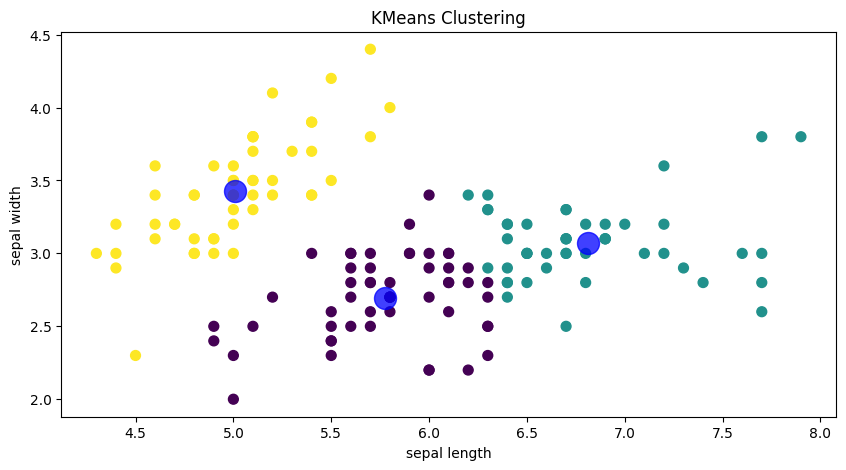

In [82]:

dfc_scaled = iris.data[:, :2]  # Use only the first two features for simplicity
 
# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(dfc_scaled)
 
# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(dfc_scaled[:, 0], dfc_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=250, alpha=0.75)
plt.title("KMeans Clustering")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()


The different colored points represent different clusters. Each cluster groups together data points that are similar to each other based on their features. Found the centers of each clusters to to form equally

### Why KMeans is Suitable for the Iris Dataset:

The Iris dataset has a simple structure with distinct species that are expected to form well-separated clusters.
KMeans is efficient for datasets with a moderate number of features and samples, as is the case here.

## Implementing Hierarchial clustering algorithm in the Iris Dataset

Description of Hierarchical Clustering: 

Hierarchical clustering creates a hierarchy of clusters either by:

Agglomerative (Bottom-Up): Starting with individual data points as their own clusters and iteratively merging the closest clusters.

Divisive (Top-Down): Starting with all data points in one cluster and iteratively splitting them.

In agglomerative clustering, which is more common, clusters are merged based on a linkage criterion such as single, complete, or average linkage.

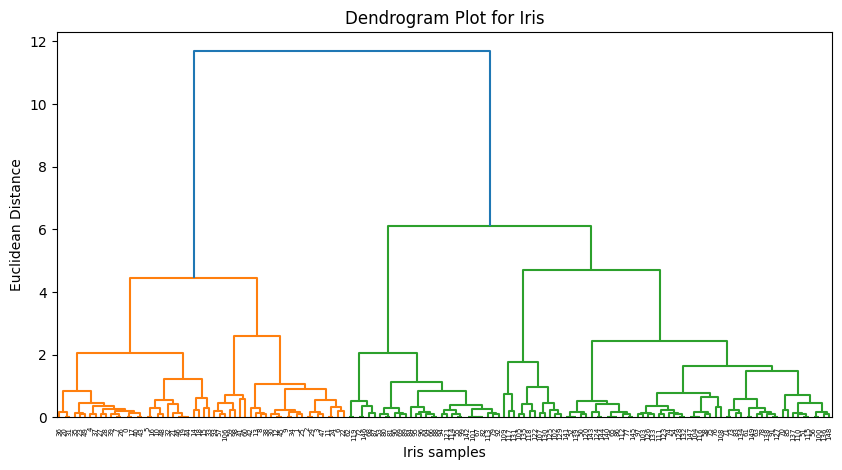

In [85]:
# Dendrogram plot
import scipy.cluster.hierarchy as shc

# Calculate linkage using Ward's method and create the dendrogram
plt.figure(figsize=(10, 5))
linked = shc.linkage(dfc_scaled, method="ward")
dendro = shc.dendrogram(linked)

plt.title("Dendrogram Plot for Iris")
plt.ylabel("Euclidean Distance")
plt.xlabel("Iris samples")
plt.show()


This Dendogram shows the hierarchy in distances between Iris samples to find the number of clusters

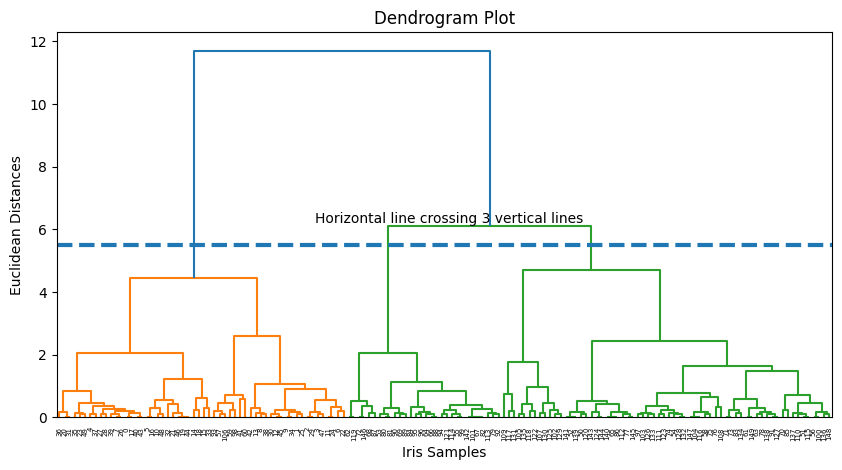

In [86]:
plt.figure(figsize=(10, 5))
dendro = shc.dendrogram(linked)
plt.hlines(y=5.5,xmin=0,xmax=1500,lw=3,linestyles='--')
plt.text(x=500,y=6.2,s='Horizontal line crossing 3 vertical lines')
plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Iris Samples")
plt.show()


A horizontal line is drawn in the dendogram plot to find the number of clusters in Hierarchial clustering ( finds by the touch point of horizontal line and vertical heirarchy plot)

In [87]:
#build the model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(dfc_scaled)
hc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int64)

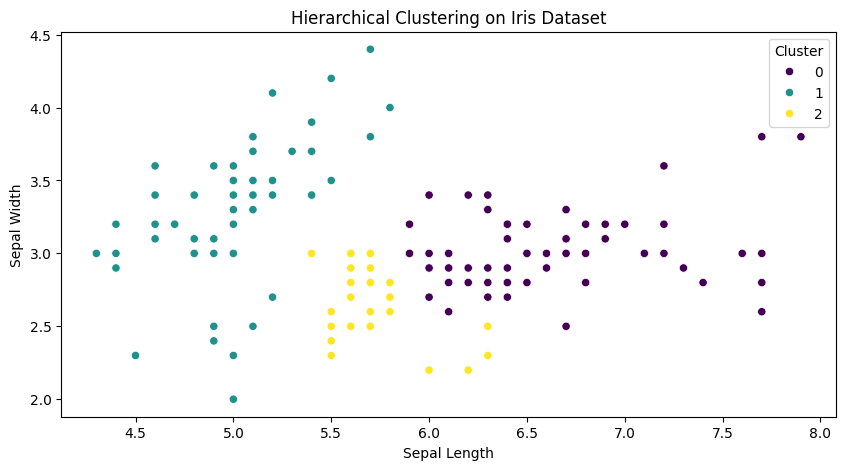

In [88]:
# Plotting
plt.figure(figsize=(10, 5))
sns.scatterplot(x=dfc_scaled[:, 0], y=dfc_scaled[:, 1], hue=hc_pred, palette='viridis')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Cluster')
plt.show()

Scatterplot shows the number of clusters with different colours between Sepal width and Sepal length ( number of clusters found in dendogram as 3)

### Silhouette Analysis

In [89]:
sa = []
for k in k_rng:
    hc=AgglomerativeClustering(n_clusters=k)
    hc_pred=hc.fit_predict(dfc_scaled)
    sa.append(silhouette_score(dfc_scaled, hc_pred))

sa

[0.47767996898758924,
 0.36533468191633894,
 0.3823159421185043,
 0.38724618388871174,
 0.39180003578295014,
 0.3444958936522699,
 0.32799364657656865,
 0.3520317540988599,
 0.36717791299216496]

Hierarchical clustering is better suited for small datasets due to its high time and space complexity.

### Why Hierarchical Clustering is Suitable for the Iris Dataset:

The method does not require the number of clusters to be specified a priori, which is useful if the number of natural groupings is unknown.
It provides a dendrogram, offering a visual insight into the data structure and the appropriate number of clusters.